[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://tinyurl.com/ykrn2km3)

## Introducción

En este notebook, vamos a explorar cómo cargar un dataset utilizando la biblioteca de Python, Pandas. Pandas es una herramienta poderosa que nos permite manipular y analizar datos de manera eficiente. 

Para ilustrar este proceso, utilizaremos un dataset de regresión de costos de seguro. Este dataset contiene información sobre los costos de seguro de salud de diferentes individuos.

A continuación, se muestra cómo cargar este dataset en un DataFrame de Pandas.

> **Nota:** Cambiar la ruta del archivo de acuerdo a la ubicación en su computadora.



In [1]:
# verificar si estamos en google colab
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

In [2]:
if IN_COLAB:
    # download a folder from github
    !wget -O datasets.zip https://github.com/DiegoPaezA/CienciaDatos-MASDI/archive/refs/heads/main.zip
    !unzip datasets.zip
    !mv CienciaDatos-MASDI-main/datasets datasets_github
    !rm -rf datasets.zip CienciaDatos-MASDI-main

In [3]:
import os
# Obtener el directorio raíz del proyecto
dir_root = os.path.dirname(os.getcwd())


In [4]:
# Importamos la biblioteca pandas
import pandas as pd

# definimos la ruta del dataset a cargar
datasets_folder_name = 'content/datasets_github' if IN_COLAB else 'datasets'
ruta_dataset = os.path.join(dir_root, datasets_folder_name, 'regression', 'insurance_cost.csv')

# Cargamos el dataset
data = pd.read_csv(ruta_dataset)

# Mostramos las primeras 5 filas del dataset
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


> **Nota:** Pandas también proporciona una función para leer archivos de Excel, llamada `read_excel`. 


## Exploración del DataFrame

Una vez que hemos cargado nuestros datos en un DataFrame de Pandas, hay varias funciones útiles que podemos utilizar para explorar nuestros datos.




### 1. **Obtener información sobre el DataFrame**

De esta manera, podemos ver el número de filas y columnas que contiene el DataFrame, junto con el tipo de datos que contiene cada columna.

Lo cual nos permite responder preguntas como:

* ¿Cuántas filas y columnas hay en el DataFrame?
* ¿Qué tipo de datos contiene cada columna?
* ¿Hay valores faltantes en el DataFrame?
* ¿Qué columnas o filas contienen valores faltantes?
* ¿Qué columnas contienen valores numéricos?
* ¿Qué columnas contienen valores no numéricos?
* ¿Qué columnas pueden ser características?
* ¿Qué columna contiene la variable objetivo?




In [23]:
# Mostrar información sobre el DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### 2. **Obtener estadísticas descriptivas**

Podemos usar la función `describe` para obtener estadísticas descriptivas sobre columnas numéricas en el DataFrame. Esto nos dará el número de valores en la columna, el valor medio, la desviación estándar, el valor mínimo, el valor máximo y varios percentiles para cada columna numérica.

Lo cual nos permite responder preguntas como:

* ¿Cuál es el valor medio de cada columna numérica?
* ¿Cuál es el valor máximo de cada columna numérica?
* ¿Cuál es el valor mínimo de cada columna numérica?
* ¿Cuál es la desviación estándar de cada columna numérica?
* ¿Cuál es el percentil 25, 50 y 75 de cada columna numérica?
  

In [24]:
# Mostrar estadísticas descriptivas
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### 3. **Verificar si hay valores faltantes**

Podemos usar la función `isnull` para verificar si hay valores faltantes en el DataFrame. Esto nos dará una matriz booleana que indica si cada celda en el DataFrame contiene o no un valor faltante.


In [25]:
# Verificar si hay valores faltantes
print(data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


### 4. **Explorar la distribución de la variable objetivo**

Para estudiar una variable continua, podemos usar un histograma para visualizar la distribución de valores. Podemos usar la función `hist` para crear un histograma de una columna en el DataFrame.

Esto nos permite responder preguntas como:

* ¿Cuál es la distribución de valores para la variable objetivo?
* ¿Cuál es el rango de valores para la variable objetivo?
* ¿Cuál es la media de la variable objetivo?
* ¿Existe una asimetría en la distribución de la variable objetivo?
* ¿Existen valores atípicos en la variable objetivo?


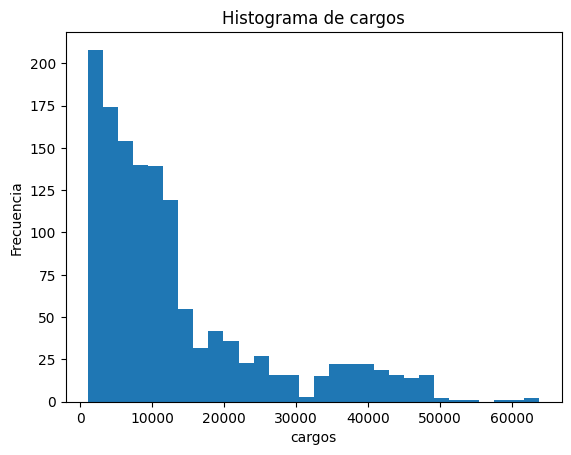

In [26]:
# histograma de la variable objetivo
import matplotlib.pyplot as plt
plt.hist(data['charges'], bins=30)
plt.xlabel('cargos')
plt.ylabel('Frecuencia')
plt.title('Histograma de cargos')
plt.show()


### 5. **Explorar la correlación entre las variables**

Podemos usar la función `corr` para explorar la correlación entre las variables. Esto nos dará una matriz de correlación que muestra la correlación entre cada par de variables.

Lo cual nos permite responder preguntas como:

* ¿Qué variables están altamente correlacionadas entre sí?
* ¿Qué variables están altamente correlacionadas con la variable objetivo?
* ¿Qué variables están altamente correlacionadas con la variable objetivo, pero no entre sí?
* ¿Qué variables no están correlacionadas con la variable objetivo?
  

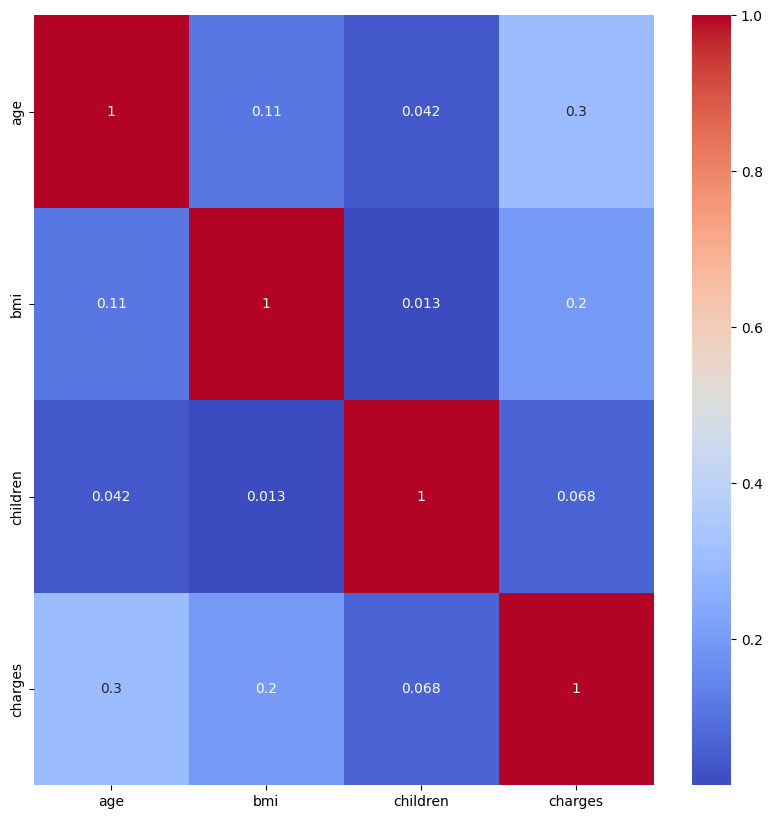

In [27]:
import seaborn as sns


# Suponiendo que 'data' es tu DataFrame
correlation_matrix = data.corr(numeric_only=True)

plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

### 6. **Explorar la distribución de las variables**

Podemos usar la función `hist` para explorar la distribución de las variables. Esto nos dará un histograma para cada columna numérica en el DataFrame.

Lo cual nos permite responder preguntas como:

* ¿Qué tipo de distribución tiene cada columna numérica?
* ¿Qué tipo de distribución tiene la variable objetivo?
* ¿Qué tipo de distribución tienen las variables numéricas que están altamente correlacionadas con la variable objetivo?
* ¿Qué tipo de distribución tienen las variables numéricas que no están correlacionadas con la variable objetivo?
* ¿Qué variables son continuas?
* ¿Qué variables son discretas o categóricas?

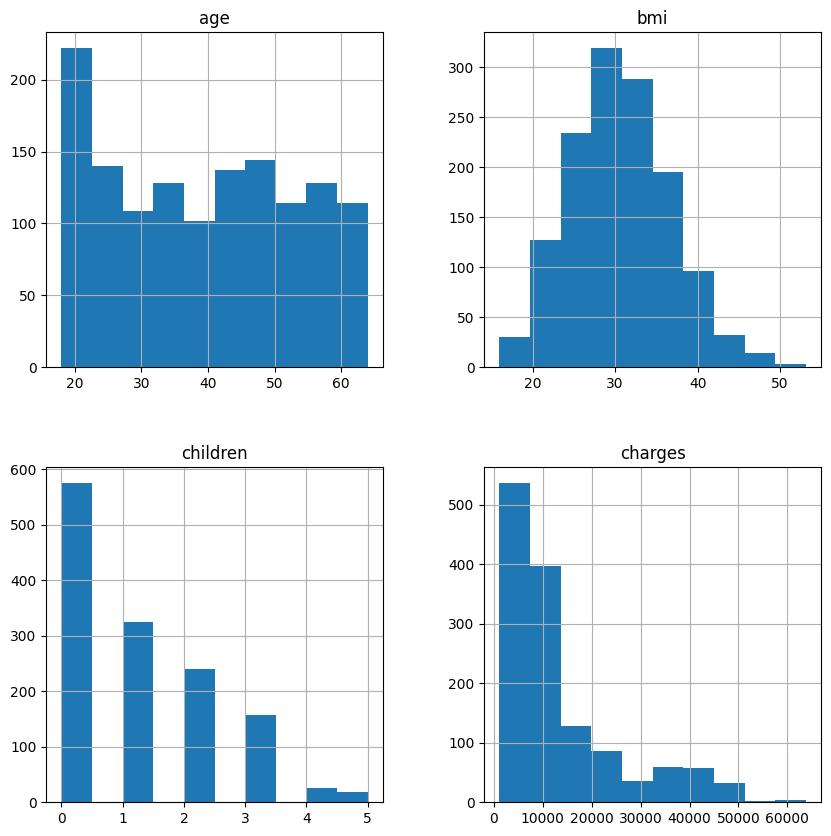

In [28]:
data.hist(figsize=(10, 10))
plt.show()

### 7. **Explorar la distribución de las variables categóricas**

Podemos usar la función `value_counts` para explorar la distribución de las variables categóricas. Esto nos dará el número de valores únicos para cada variable categórica en el DataFrame.

Lo cual nos permite responder preguntas como:

* ¿Cuántos valores únicos hay para cada variable categórica?
* ¿Cuál es la distribución de valores para cada variable categórica?

In [29]:
print(data['smoker'].value_counts())

no     1064
yes     274
Name: smoker, dtype: int64


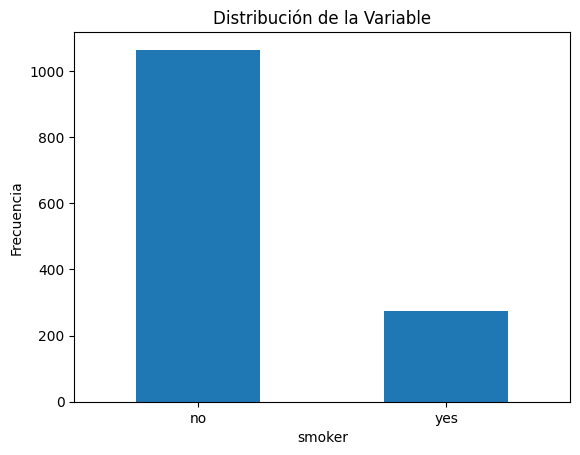

In [30]:
# Visualizar la distribución de variables categóricas
count_classes = pd.value_counts(data['smoker'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Distribución de la Variable")
plt.ylabel("Frecuencia")
plt.xlabel("smoker");

In [31]:
print(data['region'].value_counts())

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


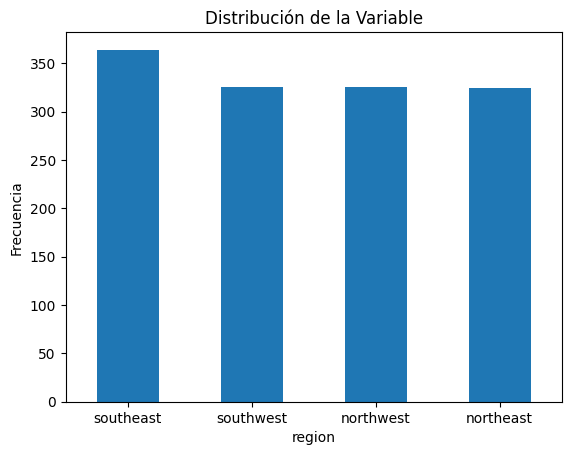

In [32]:
count_classes = pd.value_counts(data['region'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Distribución de la Variable")
plt.ylabel("Frecuencia")
plt.xlabel("region");

**Sugerencias para el próximo paso:**
- Visualizar los datos con gráficos.
- Preprocesar los datos para el aprendizaje automático.
- Dividir el dataset en conjuntos de entrenamiento y prueba.